\
<span style="color:white; background-color:#B20000; font-size:50px">先講結論</span>
1. 本章大抵來說就是教集成方法，其他在教學目標中有提的項目沒有細講。
2. 最後透過 mlflow 提供了一個檢視全部訓練模型的介面，但僅言盡於此，沒有說有甚麼用途。

本文源自
- https://www.kaggle.com/mirichoi0218/insurance#insurance.csv
- https://towardsdatascience.com/build-and-deploy-your-first-machine-learning-web-app-e020db344a99

# 資料引入

In [1]:
# read the csv file
import pandas as pd
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 模型訓練
- 我們直接以原文的實驗2進行
- 原文挑選 lr，但根據實測 gbr 可能才是較佳的選擇
- 經過計算，若未指定訓練集與驗證集，pycaret 預設的比例是訓練集 70%、驗證集 30%

In [2]:
from pycaret.regression import *
r2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True,
           feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [3]:
# best = compare_models()    # 之前已經試驗過了，此處就不再重跑

## Linear Regression

In [4]:
# Model Training and Validation 
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3080.5266,21362818.0000,4621.9927,0.8724,0.4133,0.3280
1,3405.0522,31559854.0000,5617.8159,0.8165,0.4286,0.3206
2,2985.2944,23914200.0000,4890.2148,0.6972,0.5783,0.3796
3,3131.9441,20934184.0000,4575.3892,0.8252,0.4750,0.4442
4,3385.6992,29317690.0000,5414.5811,0.7819,0.4593,0.3177
5,3251.9485,26735156.0000,5170.6050,0.8280,0.4569,0.3045
6,3014.6270,27070258.0000,5202.9087,0.8158,0.3822,0.3140
7,3540.9238,31011590.0000,5568.8052,0.8295,0.4962,0.3280
8,3225.2019,23172014.0000,4813.7319,0.8503,0.4036,0.3572
9,3382.1775,29852028.0000,5463.7012,0.8077,0.5222,0.3731


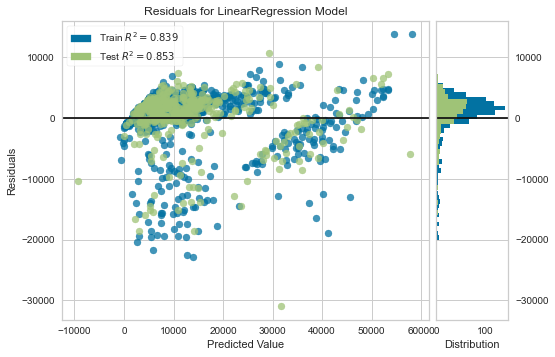

In [5]:
# plot residuals of trained model
plot_model(lr, plot = 'residuals')

In [6]:
# save transformation pipeline and model 
save_model(lr, model_name = 'lr')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              n_jobs=-1, random_state=123, subclass='binary',
                              target='charges'

## Gradient Boosting Regressor

In [7]:
# Model Training and Validation 
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2638.3041,20995120.8460,4582.0433,0.8746,0.4611,0.3423
1,2973.1802,31318392.7195,5596.2838,0.8179,0.4443,0.2845
2,2892.5452,26634475.3883,5160.8599,0.6628,0.5568,0.4182
3,3007.3027,23007841.9164,4796.6490,0.8079,0.5192,0.4419
4,2989.1547,27404992.3755,5234.9778,0.7962,0.5055,0.3437
5,2598.1880,19973215.6052,4469.1404,0.8715,0.3760,0.2473
6,2490.8104,20661370.0047,4545.4780,0.8594,0.3696,0.2807
7,2800.1227,26835998.4310,5180.3473,0.8524,0.4652,0.2925
8,2501.4044,20147991.9546,4488.6515,0.8699,0.4170,0.3324
9,2879.4351,27983813.0476,5289.9729,0.8198,0.5576,0.4159


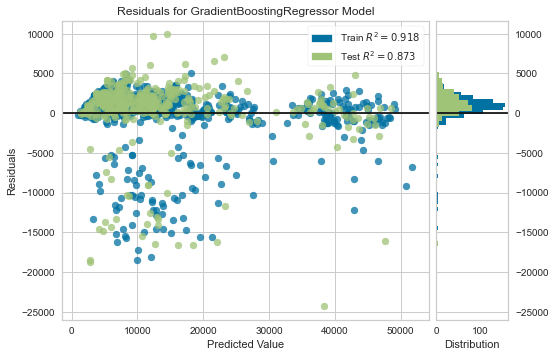

In [8]:
# plot residuals of trained model
plot_model(gbr, plot = 'residuals')

In [9]:
# save transformation pipeline and model 
save_model(gbr, model_name = 'gbr')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           

# 在 local 端測試應用程式
- 執行後應該可以在 terminal 看到：Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)

In [ ]:
%run app.py

Transformation Pipeline and Model Successfully Loaded
 * Serving Flask app 'app' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat
